In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch

In [3]:
import scanpy as sc
import numpy as np
import scvi
import seaborn as sns
import matplotlib.pyplot as plt
import moscot
from moscot.problems.time import TemporalProblem
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Global seed set to 0
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/docrep/decorators.py:43: SyntaxWarning: 'CompoundBaseProblem_push.raises' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/docrep/decorators.py:43: SyntaxWarning: 'CompoundBaseProblem_pull.raises' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


In [4]:
adata_processed = sc.read("/storage/groups/ml01/workspace/dominik.klein/scMultiome_NVF/scMultiome_NVF_E14-E15/adata_preprocessed.h5ad")

In [5]:
adata = sc.read_h5ad("/storage/groups/ml01/workspace/dominik.klein/scMultiome_NVF/scMultiome_NVF_E14-E15/E14-E15_adata_filtered_rmDoublets_sctNormalized_WNN_embedded_initialAnno.h5ad")

In [6]:
adata.obs['time'] = adata.obs.apply(lambda x: 0 if x["sample"]=="E14.5" else 1, axis=1)

# scVI on GEX space

In [7]:
#adata_gex = adata[:, adata.var["feature_type"]=="GEX"].copy()
#adata_gex.obsm["X_pca"] = adata.obsm["GEX_pca"].copy()
#adata_gex.obsm["X_umap"] = adata.obsm["GEX_umap"].copy()

In [8]:
adata

AnnData object with n_obs × n_vars = 16978 × 14663
    obs: 'n_counts', 'sample', 'int_id', 'reporter', 'log_cell_probs', 'cell_barcodes_du', 'cell_barcodes_cr', 'cell_barcodes', 'log_counts', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac', 'total_counts_rank', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'log_nCount_ATAC', 'log_nFeature_ATAC', 'scrublet_scores', 'scrublet_doublets', 'scrublet_doublets_cat', 'dd_doublets', 'dd_scores', 'dd_log_p_values', 'dd_voting_average', 'dd_-log_p_values', 'dd_doublets_cat', 'pANN', 'DF_classifications_1', 'DF_classifications_2', 'pANN_SCT', 'DF_SCT_classifications_1', 'DF_SCT_classifications_2', 'df_doublets',

In [8]:
sc.tl.umap(adata)

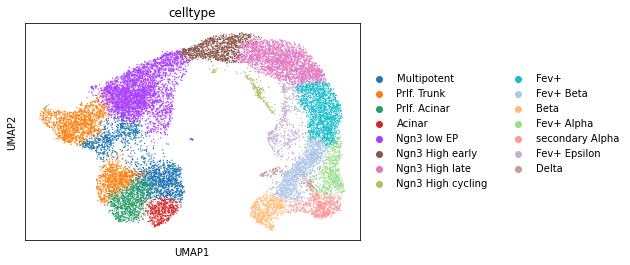

In [9]:
sc.pl.umap(adata, color="celltype")

In [9]:
adata.layers["counts"] = np.exp(adata.layers["raw_counts"])

In [10]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True)

In [11]:
scvi.model.SCVI.setup_anndata(adata, layer="counts", batch_key="sample")

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/data/fields/_layer_field.py:78: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(


In [12]:
vae = scvi.model.SCVI(adata)
vae.train()


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.


Epoch 1/400:   0%|          | 0/400 [00:00<?, ?it/s]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:61: UserWarning: Specified kernel cache directory could not be created! This disables kernel caching. Specified directory is /home/icb/dominik.klein/.cache/torch/kernels. This warning will appear only once per process. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646756402876/work/aten/src/ATen/native/cuda/jit_utils.cpp:860.)
  + torch.lgamma(x + theta)
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 2/400:   0%|          | 1/400 [00:10<1:06:42, 10.03s/it, loss=3.5e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 3/400:   0%|          | 2/400 [00:11<32:11,  4.85s/it, loss=3.39e+03, v_num=1] 

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 4/400:   1%|          | 3/400 [00:12<21:40,  3.28s/it, loss=3.31e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 5/400:   1%|          | 4/400 [00:13<16:25,  2.49s/it, loss=3.25e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 6/400:   1%|▏         | 5/400 [00:15<13:23,  2.03s/it, loss=3.19e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 7/400:   2%|▏         | 6/400 [00:16<11:37,  1.77s/it, loss=3.15e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 8/400:   2%|▏         | 7/400 [00:17<10:29,  1.60s/it, loss=3.1e+03, v_num=1] 

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 9/400:   2%|▏         | 8/400 [00:18<09:44,  1.49s/it, loss=3.06e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 10/400:   2%|▏         | 9/400 [00:20<09:11,  1.41s/it, loss=3.02e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 11/400:   2%|▎         | 10/400 [00:21<08:49,  1.36s/it, loss=2.99e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 12/400:   3%|▎         | 11/400 [00:22<08:34,  1.32s/it, loss=2.96e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 13/400:   3%|▎         | 12/400 [00:23<08:09,  1.26s/it, loss=2.93e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 14/400:   3%|▎         | 13/400 [00:25<08:33,  1.33s/it, loss=2.9e+03, v_num=1] 

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 15/400:   4%|▎         | 14/400 [00:26<08:24,  1.31s/it, loss=2.88e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 16/400:   4%|▍         | 15/400 [00:27<08:12,  1.28s/it, loss=2.86e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 17/400:   4%|▍         | 16/400 [00:28<08:02,  1.26s/it, loss=2.84e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 18/400:   4%|▍         | 17/400 [00:30<07:53,  1.24s/it, loss=2.82e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 19/400:   4%|▍         | 18/400 [00:31<07:59,  1.25s/it, loss=2.81e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 20/400:   5%|▍         | 19/400 [00:32<08:20,  1.31s/it, loss=2.79e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 21/400:   5%|▌         | 20/400 [00:34<08:13,  1.30s/it, loss=2.77e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 22/400:   5%|▌         | 21/400 [00:35<08:22,  1.33s/it, loss=2.76e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 23/400:   6%|▌         | 22/400 [00:36<08:07,  1.29s/it, loss=2.75e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 24/400:   6%|▌         | 23/400 [00:37<07:57,  1.27s/it, loss=2.74e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 25/400:   6%|▌         | 24/400 [00:39<08:06,  1.29s/it, loss=2.72e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 26/400:   6%|▋         | 25/400 [00:40<08:10,  1.31s/it, loss=2.72e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 27/400:   6%|▋         | 26/400 [00:41<08:09,  1.31s/it, loss=2.71e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 28/400:   7%|▋         | 27/400 [00:43<08:09,  1.31s/it, loss=2.69e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 29/400:   7%|▋         | 28/400 [00:44<08:14,  1.33s/it, loss=2.69e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 30/400:   7%|▋         | 29/400 [00:45<08:13,  1.33s/it, loss=2.68e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 31/400:   8%|▊         | 30/400 [00:47<08:09,  1.32s/it, loss=2.67e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 32/400:   8%|▊         | 31/400 [00:48<08:16,  1.35s/it, loss=2.66e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 33/400:   8%|▊         | 32/400 [00:49<08:08,  1.33s/it, loss=2.66e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 34/400:   8%|▊         | 33/400 [00:51<07:49,  1.28s/it, loss=2.65e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 35/400:   8%|▊         | 34/400 [00:52<07:32,  1.24s/it, loss=2.65e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 36/400:   9%|▉         | 35/400 [00:53<07:26,  1.22s/it, loss=2.65e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 37/400:   9%|▉         | 36/400 [00:54<07:31,  1.24s/it, loss=2.64e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 38/400:   9%|▉         | 37/400 [00:55<07:27,  1.23s/it, loss=2.64e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 39/400:  10%|▉         | 38/400 [00:57<07:12,  1.19s/it, loss=2.63e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 40/400:  10%|▉         | 39/400 [00:58<07:01,  1.17s/it, loss=2.63e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 41/400:  10%|█         | 40/400 [00:59<06:59,  1.16s/it, loss=2.62e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 42/400:  10%|█         | 41/400 [01:00<06:58,  1.17s/it, loss=2.62e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 43/400:  10%|█         | 42/400 [01:01<07:02,  1.18s/it, loss=2.62e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 44/400:  11%|█         | 43/400 [01:02<07:08,  1.20s/it, loss=2.62e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 45/400:  11%|█         | 44/400 [01:04<07:08,  1.20s/it, loss=2.62e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 46/400:  11%|█▏        | 45/400 [01:05<07:09,  1.21s/it, loss=2.61e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 47/400:  12%|█▏        | 46/400 [01:06<07:11,  1.22s/it, loss=2.61e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 48/400:  12%|█▏        | 47/400 [01:07<07:12,  1.23s/it, loss=2.6e+03, v_num=1] 

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 49/400:  12%|█▏        | 48/400 [01:09<07:21,  1.25s/it, loss=2.61e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 50/400:  12%|█▏        | 49/400 [01:10<07:23,  1.26s/it, loss=2.6e+03, v_num=1] 

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 51/400:  12%|█▎        | 50/400 [01:11<07:25,  1.27s/it, loss=2.6e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 52/400:  13%|█▎        | 51/400 [01:13<07:28,  1.29s/it, loss=2.6e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 53/400:  13%|█▎        | 52/400 [01:14<07:29,  1.29s/it, loss=2.59e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 54/400:  13%|█▎        | 53/400 [01:15<07:28,  1.29s/it, loss=2.6e+03, v_num=1] 

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 55/400:  14%|█▎        | 54/400 [01:17<07:30,  1.30s/it, loss=2.59e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 56/400:  14%|█▍        | 55/400 [01:18<07:28,  1.30s/it, loss=2.59e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 57/400:  14%|█▍        | 56/400 [01:19<07:25,  1.29s/it, loss=2.59e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 58/400:  14%|█▍        | 57/400 [01:20<07:14,  1.27s/it, loss=2.59e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 59/400:  14%|█▍        | 58/400 [01:21<07:00,  1.23s/it, loss=2.59e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 60/400:  15%|█▍        | 59/400 [01:23<06:57,  1.22s/it, loss=2.59e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 61/400:  15%|█▌        | 60/400 [01:24<07:16,  1.28s/it, loss=2.59e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 62/400:  15%|█▌        | 61/400 [01:25<07:11,  1.27s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 63/400:  16%|█▌        | 62/400 [01:27<07:09,  1.27s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 64/400:  16%|█▌        | 63/400 [01:28<07:04,  1.26s/it, loss=2.59e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 65/400:  16%|█▌        | 64/400 [01:29<07:09,  1.28s/it, loss=2.59e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 66/400:  16%|█▋        | 65/400 [01:30<07:09,  1.28s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 67/400:  16%|█▋        | 66/400 [01:32<07:10,  1.29s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 68/400:  17%|█▋        | 67/400 [01:33<07:09,  1.29s/it, loss=2.59e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 69/400:  17%|█▋        | 68/400 [01:34<06:58,  1.26s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 70/400:  17%|█▋        | 69/400 [01:36<07:02,  1.28s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 71/400:  18%|█▊        | 70/400 [01:37<07:09,  1.30s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 72/400:  18%|█▊        | 71/400 [01:38<07:18,  1.33s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 73/400:  18%|█▊        | 72/400 [01:40<07:19,  1.34s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 74/400:  18%|█▊        | 73/400 [01:41<07:22,  1.35s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 75/400:  18%|█▊        | 74/400 [01:42<07:19,  1.35s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 76/400:  19%|█▉        | 75/400 [01:44<07:16,  1.34s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 77/400:  19%|█▉        | 76/400 [01:45<07:04,  1.31s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 78/400:  19%|█▉        | 77/400 [01:46<07:13,  1.34s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 79/400:  20%|█▉        | 78/400 [01:48<07:04,  1.32s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 80/400:  20%|█▉        | 79/400 [01:49<06:54,  1.29s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 81/400:  20%|██        | 80/400 [01:50<07:01,  1.32s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 82/400:  20%|██        | 81/400 [01:52<07:04,  1.33s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 83/400:  20%|██        | 82/400 [01:53<06:55,  1.31s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 84/400:  21%|██        | 83/400 [01:54<06:43,  1.27s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 85/400:  21%|██        | 84/400 [01:55<06:37,  1.26s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 86/400:  21%|██▏       | 85/400 [01:56<06:32,  1.25s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 87/400:  22%|██▏       | 86/400 [01:58<06:33,  1.25s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 88/400:  22%|██▏       | 87/400 [01:59<06:31,  1.25s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 89/400:  22%|██▏       | 88/400 [02:00<06:26,  1.24s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 90/400:  22%|██▏       | 89/400 [02:01<06:25,  1.24s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 91/400:  22%|██▎       | 90/400 [02:03<06:22,  1.23s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 92/400:  23%|██▎       | 91/400 [02:04<06:22,  1.24s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 93/400:  23%|██▎       | 92/400 [02:05<06:35,  1.28s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 94/400:  23%|██▎       | 93/400 [02:07<06:44,  1.32s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 95/400:  24%|██▎       | 94/400 [02:08<06:56,  1.36s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 96/400:  24%|██▍       | 95/400 [02:10<07:07,  1.40s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 97/400:  24%|██▍       | 96/400 [02:11<07:09,  1.41s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 98/400:  24%|██▍       | 97/400 [02:13<07:17,  1.45s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 99/400:  24%|██▍       | 98/400 [02:14<07:13,  1.43s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 100/400:  25%|██▍       | 99/400 [02:16<07:18,  1.46s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 101/400:  25%|██▌       | 100/400 [02:17<06:57,  1.39s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 102/400:  25%|██▌       | 101/400 [02:18<06:49,  1.37s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 103/400:  26%|██▌       | 102/400 [02:20<06:53,  1.39s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 104/400:  26%|██▌       | 103/400 [02:21<07:04,  1.43s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 105/400:  26%|██▌       | 104/400 [02:22<07:01,  1.42s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 106/400:  26%|██▋       | 105/400 [02:24<06:58,  1.42s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 107/400:  26%|██▋       | 106/400 [02:25<06:52,  1.40s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 108/400:  27%|██▋       | 107/400 [02:27<06:46,  1.39s/it, loss=2.56e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 109/400:  27%|██▋       | 108/400 [02:28<06:32,  1.34s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 110/400:  27%|██▋       | 109/400 [02:29<06:21,  1.31s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 111/400:  28%|██▊       | 110/400 [02:30<06:17,  1.30s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 112/400:  28%|██▊       | 111/400 [02:32<06:22,  1.32s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 113/400:  28%|██▊       | 112/400 [02:33<06:32,  1.36s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 114/400:  28%|██▊       | 113/400 [02:35<06:47,  1.42s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 115/400:  28%|██▊       | 114/400 [02:36<06:47,  1.43s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 116/400:  29%|██▉       | 115/400 [02:38<06:51,  1.44s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 117/400:  29%|██▉       | 116/400 [02:39<06:49,  1.44s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 118/400:  29%|██▉       | 117/400 [02:40<06:42,  1.42s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 119/400:  30%|██▉       | 118/400 [02:42<06:37,  1.41s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 120/400:  30%|██▉       | 119/400 [02:43<06:28,  1.38s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 121/400:  30%|███       | 120/400 [02:45<06:27,  1.38s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 122/400:  30%|███       | 121/400 [02:46<06:32,  1.41s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 123/400:  30%|███       | 122/400 [02:47<06:19,  1.36s/it, loss=2.56e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 124/400:  31%|███       | 123/400 [02:49<06:07,  1.33s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 125/400:  31%|███       | 124/400 [02:50<05:54,  1.29s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 126/400:  31%|███▏      | 125/400 [02:51<05:46,  1.26s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 127/400:  32%|███▏      | 126/400 [02:52<05:42,  1.25s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 128/400:  32%|███▏      | 127/400 [02:53<05:38,  1.24s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 129/400:  32%|███▏      | 128/400 [02:55<05:34,  1.23s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 130/400:  32%|███▏      | 129/400 [02:56<05:35,  1.24s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 131/400:  32%|███▎      | 130/400 [02:57<05:30,  1.22s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 132/400:  33%|███▎      | 131/400 [02:58<05:31,  1.23s/it, loss=2.56e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 133/400:  33%|███▎      | 132/400 [03:00<05:35,  1.25s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 134/400:  33%|███▎      | 133/400 [03:01<05:50,  1.31s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 135/400:  34%|███▎      | 134/400 [03:02<05:50,  1.32s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 136/400:  34%|███▍      | 135/400 [03:04<05:46,  1.31s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 137/400:  34%|███▍      | 136/400 [03:05<05:46,  1.31s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 138/400:  34%|███▍      | 137/400 [03:06<06:03,  1.38s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 139/400:  34%|███▍      | 138/400 [03:08<06:14,  1.43s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 140/400:  35%|███▍      | 139/400 [03:09<06:04,  1.40s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 141/400:  35%|███▌      | 140/400 [03:11<06:03,  1.40s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 142/400:  35%|███▌      | 141/400 [03:12<05:47,  1.34s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 143/400:  36%|███▌      | 142/400 [03:13<05:47,  1.35s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 144/400:  36%|███▌      | 143/400 [03:15<05:49,  1.36s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 145/400:  36%|███▌      | 144/400 [03:16<05:52,  1.38s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 146/400:  36%|███▋      | 145/400 [03:18<05:52,  1.38s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 147/400:  36%|███▋      | 146/400 [03:19<05:53,  1.39s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 148/400:  37%|███▋      | 147/400 [03:20<05:52,  1.39s/it, loss=2.56e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 149/400:  37%|███▋      | 148/400 [03:22<05:40,  1.35s/it, loss=2.56e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 150/400:  37%|███▋      | 149/400 [03:23<05:31,  1.32s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 151/400:  38%|███▊      | 150/400 [03:24<05:22,  1.29s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 152/400:  38%|███▊      | 151/400 [03:25<05:20,  1.29s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 153/400:  38%|███▊      | 152/400 [03:27<05:37,  1.36s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 154/400:  38%|███▊      | 153/400 [03:28<05:49,  1.42s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 155/400:  38%|███▊      | 154/400 [03:30<05:49,  1.42s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 156/400:  39%|███▉      | 155/400 [03:31<05:56,  1.46s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 157/400:  39%|███▉      | 156/400 [03:33<05:50,  1.44s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 158/400:  39%|███▉      | 157/400 [03:34<05:40,  1.40s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 159/400:  40%|███▉      | 158/400 [03:35<05:35,  1.39s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 160/400:  40%|███▉      | 159/400 [03:37<05:29,  1.37s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 161/400:  40%|████      | 160/400 [03:38<05:10,  1.29s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 162/400:  40%|████      | 161/400 [03:39<05:04,  1.27s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 163/400:  40%|████      | 162/400 [03:41<05:18,  1.34s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 164/400:  41%|████      | 163/400 [03:42<05:08,  1.30s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 165/400:  41%|████      | 164/400 [03:43<04:59,  1.27s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 166/400:  41%|████▏     | 165/400 [03:44<04:55,  1.26s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 167/400:  42%|████▏     | 166/400 [03:45<04:50,  1.24s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 168/400:  42%|████▏     | 167/400 [03:47<04:52,  1.25s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 169/400:  42%|████▏     | 168/400 [03:48<04:59,  1.29s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 170/400:  42%|████▏     | 169/400 [03:49<05:04,  1.32s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 171/400:  42%|████▎     | 170/400 [03:51<05:02,  1.32s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 172/400:  43%|████▎     | 171/400 [03:52<04:53,  1.28s/it, loss=2.56e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 173/400:  43%|████▎     | 172/400 [03:53<04:50,  1.28s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 174/400:  43%|████▎     | 173/400 [03:55<04:54,  1.30s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 175/400:  44%|████▎     | 174/400 [03:56<04:58,  1.32s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 176/400:  44%|████▍     | 175/400 [03:57<04:57,  1.32s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 177/400:  44%|████▍     | 176/400 [03:59<05:00,  1.34s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 178/400:  44%|████▍     | 177/400 [04:00<04:58,  1.34s/it, loss=2.56e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 179/400:  44%|████▍     | 178/400 [04:01<04:57,  1.34s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 180/400:  45%|████▍     | 179/400 [04:03<04:57,  1.34s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 181/400:  45%|████▌     | 180/400 [04:04<04:59,  1.36s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 182/400:  45%|████▌     | 181/400 [04:06<04:59,  1.37s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 183/400:  46%|████▌     | 182/400 [04:07<04:49,  1.33s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 184/400:  46%|████▌     | 183/400 [04:08<04:43,  1.31s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 185/400:  46%|████▌     | 184/400 [04:09<04:35,  1.28s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 186/400:  46%|████▋     | 185/400 [04:10<04:30,  1.26s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 187/400:  46%|████▋     | 186/400 [04:12<04:24,  1.24s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 188/400:  47%|████▋     | 187/400 [04:13<04:23,  1.24s/it, loss=2.56e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 189/400:  47%|████▋     | 188/400 [04:14<04:25,  1.25s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 190/400:  47%|████▋     | 189/400 [04:15<04:24,  1.25s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 191/400:  48%|████▊     | 190/400 [04:17<04:20,  1.24s/it, loss=2.56e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 192/400:  48%|████▊     | 191/400 [04:18<04:15,  1.22s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 193/400:  48%|████▊     | 192/400 [04:19<04:07,  1.19s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 194/400:  48%|████▊     | 193/400 [04:20<04:04,  1.18s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 195/400:  48%|████▊     | 194/400 [04:21<04:07,  1.20s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 196/400:  49%|████▉     | 195/400 [04:23<04:07,  1.20s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 197/400:  49%|████▉     | 196/400 [04:24<04:08,  1.22s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 198/400:  49%|████▉     | 197/400 [04:25<04:09,  1.23s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 199/400:  50%|████▉     | 198/400 [04:26<04:08,  1.23s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 200/400:  50%|████▉     | 199/400 [04:27<04:05,  1.22s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 201/400:  50%|█████     | 200/400 [04:29<04:03,  1.22s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 202/400:  50%|█████     | 201/400 [04:30<04:01,  1.22s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 203/400:  50%|█████     | 202/400 [04:31<04:00,  1.21s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 204/400:  51%|█████     | 203/400 [04:32<03:56,  1.20s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 205/400:  51%|█████     | 204/400 [04:33<03:52,  1.19s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 206/400:  51%|█████▏    | 205/400 [04:35<03:54,  1.20s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 207/400:  52%|█████▏    | 206/400 [04:36<03:53,  1.20s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 208/400:  52%|█████▏    | 207/400 [04:37<03:46,  1.17s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 209/400:  52%|█████▏    | 208/400 [04:38<03:41,  1.15s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 210/400:  52%|█████▏    | 209/400 [04:39<03:37,  1.14s/it, loss=2.56e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 211/400:  52%|█████▎    | 210/400 [04:40<03:35,  1.13s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 212/400:  53%|█████▎    | 211/400 [04:41<03:34,  1.13s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 213/400:  53%|█████▎    | 212/400 [04:43<03:34,  1.14s/it, loss=2.56e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 214/400:  53%|█████▎    | 213/400 [04:44<03:31,  1.13s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 215/400:  54%|█████▎    | 214/400 [04:45<03:29,  1.12s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 216/400:  54%|█████▍    | 215/400 [04:46<03:26,  1.12s/it, loss=2.56e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 217/400:  54%|█████▍    | 216/400 [04:47<03:26,  1.12s/it, loss=2.56e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 218/400:  54%|█████▍    | 217/400 [04:48<03:27,  1.13s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 219/400:  55%|█████▍    | 218/400 [04:49<03:30,  1.16s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 220/400:  55%|█████▍    | 219/400 [04:51<03:33,  1.18s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 221/400:  55%|█████▌    | 220/400 [04:52<03:51,  1.29s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 222/400:  55%|█████▌    | 221/400 [04:54<03:58,  1.33s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 223/400:  56%|█████▌    | 222/400 [04:55<04:00,  1.35s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 224/400:  56%|█████▌    | 223/400 [04:56<03:59,  1.36s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 225/400:  56%|█████▌    | 224/400 [04:58<03:55,  1.34s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 226/400:  56%|█████▋    | 225/400 [04:59<04:01,  1.38s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 227/400:  56%|█████▋    | 226/400 [05:00<03:53,  1.34s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 228/400:  57%|█████▋    | 227/400 [05:02<03:46,  1.31s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 229/400:  57%|█████▋    | 228/400 [05:03<03:41,  1.29s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 230/400:  57%|█████▋    | 229/400 [05:04<03:33,  1.25s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 231/400:  57%|█████▊    | 230/400 [05:05<03:27,  1.22s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 232/400:  58%|█████▊    | 231/400 [05:06<03:21,  1.19s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 233/400:  58%|█████▊    | 232/400 [05:07<03:17,  1.18s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 234/400:  58%|█████▊    | 233/400 [05:09<03:19,  1.19s/it, loss=2.56e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 235/400:  58%|█████▊    | 234/400 [05:10<03:20,  1.21s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 236/400:  59%|█████▉    | 235/400 [05:11<03:28,  1.26s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 237/400:  59%|█████▉    | 236/400 [05:12<03:21,  1.23s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 238/400:  59%|█████▉    | 237/400 [05:14<03:16,  1.20s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 239/400:  60%|█████▉    | 238/400 [05:15<03:12,  1.19s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 240/400:  60%|█████▉    | 239/400 [05:16<03:13,  1.20s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 241/400:  60%|██████    | 240/400 [05:17<03:15,  1.22s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 242/400:  60%|██████    | 241/400 [05:19<03:18,  1.25s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 243/400:  60%|██████    | 242/400 [05:20<03:20,  1.27s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 244/400:  61%|██████    | 243/400 [05:21<03:20,  1.28s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 245/400:  61%|██████    | 244/400 [05:22<03:18,  1.27s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 246/400:  61%|██████▏   | 245/400 [05:24<03:16,  1.27s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 247/400:  62%|██████▏   | 246/400 [05:25<03:14,  1.26s/it, loss=2.56e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 248/400:  62%|██████▏   | 247/400 [05:26<03:16,  1.28s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 249/400:  62%|██████▏   | 248/400 [05:28<03:12,  1.26s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 250/400:  62%|██████▏   | 249/400 [05:29<03:06,  1.23s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 251/400:  62%|██████▎   | 250/400 [05:30<03:02,  1.22s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 252/400:  63%|██████▎   | 251/400 [05:31<03:03,  1.23s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 253/400:  63%|██████▎   | 252/400 [05:32<03:03,  1.24s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 254/400:  63%|██████▎   | 253/400 [05:34<03:00,  1.23s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 255/400:  64%|██████▎   | 254/400 [05:35<02:58,  1.22s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 256/400:  64%|██████▍   | 255/400 [05:36<02:57,  1.22s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 257/400:  64%|██████▍   | 256/400 [05:37<02:52,  1.20s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 258/400:  64%|██████▍   | 257/400 [05:38<02:48,  1.18s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 259/400:  64%|██████▍   | 258/400 [05:39<02:45,  1.17s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 260/400:  65%|██████▍   | 259/400 [05:41<02:44,  1.17s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 261/400:  65%|██████▌   | 260/400 [05:42<02:44,  1.17s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 262/400:  65%|██████▌   | 261/400 [05:43<02:44,  1.18s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 263/400:  66%|██████▌   | 262/400 [05:44<02:46,  1.20s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 264/400:  66%|██████▌   | 263/400 [05:45<02:47,  1.22s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 265/400:  66%|██████▌   | 264/400 [05:47<02:50,  1.26s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 266/400:  66%|██████▋   | 265/400 [05:48<02:53,  1.28s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 267/400:  66%|██████▋   | 266/400 [05:50<02:55,  1.31s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 268/400:  67%|██████▋   | 267/400 [05:51<02:57,  1.33s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 269/400:  67%|██████▋   | 268/400 [05:52<02:57,  1.35s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 270/400:  67%|██████▋   | 269/400 [05:54<02:56,  1.35s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 271/400:  68%|██████▊   | 270/400 [05:55<02:54,  1.34s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 272/400:  68%|██████▊   | 271/400 [05:56<02:52,  1.34s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 273/400:  68%|██████▊   | 272/400 [05:58<02:48,  1.31s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 274/400:  68%|██████▊   | 273/400 [05:59<02:43,  1.29s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 275/400:  68%|██████▊   | 274/400 [06:00<02:38,  1.26s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 276/400:  69%|██████▉   | 275/400 [06:01<02:36,  1.25s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 277/400:  69%|██████▉   | 276/400 [06:02<02:33,  1.24s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 278/400:  69%|██████▉   | 277/400 [06:04<02:32,  1.24s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 279/400:  70%|██████▉   | 278/400 [06:05<02:30,  1.23s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 280/400:  70%|██████▉   | 279/400 [06:06<02:27,  1.22s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 281/400:  70%|███████   | 280/400 [06:07<02:28,  1.23s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 282/400:  70%|███████   | 281/400 [06:09<02:25,  1.22s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 283/400:  70%|███████   | 282/400 [06:10<02:23,  1.22s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 284/400:  71%|███████   | 283/400 [06:11<02:21,  1.21s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 285/400:  71%|███████   | 284/400 [06:12<02:21,  1.22s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 286/400:  71%|███████▏  | 285/400 [06:14<02:23,  1.25s/it, loss=2.56e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 287/400:  72%|███████▏  | 286/400 [06:15<02:23,  1.26s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 288/400:  72%|███████▏  | 287/400 [06:16<02:22,  1.26s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 289/400:  72%|███████▏  | 288/400 [06:17<02:20,  1.25s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 290/400:  72%|███████▏  | 289/400 [06:19<02:21,  1.27s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 291/400:  72%|███████▎  | 290/400 [06:20<02:20,  1.28s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 292/400:  73%|███████▎  | 291/400 [06:21<02:17,  1.26s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 293/400:  73%|███████▎  | 292/400 [06:22<02:16,  1.26s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 294/400:  73%|███████▎  | 293/400 [06:24<02:14,  1.26s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 295/400:  74%|███████▎  | 294/400 [06:25<02:16,  1.28s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 296/400:  74%|███████▍  | 295/400 [06:26<02:12,  1.26s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 297/400:  74%|███████▍  | 296/400 [06:28<02:15,  1.30s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 298/400:  74%|███████▍  | 297/400 [06:29<02:22,  1.38s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 299/400:  74%|███████▍  | 298/400 [06:30<02:17,  1.35s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 300/400:  75%|███████▍  | 299/400 [06:32<02:11,  1.31s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 301/400:  75%|███████▌  | 300/400 [06:33<02:07,  1.28s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 302/400:  75%|███████▌  | 301/400 [06:34<02:03,  1.25s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 303/400:  76%|███████▌  | 302/400 [06:35<02:03,  1.26s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 304/400:  76%|███████▌  | 303/400 [06:37<02:01,  1.26s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 305/400:  76%|███████▌  | 304/400 [06:38<01:59,  1.25s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 306/400:  76%|███████▋  | 305/400 [06:39<01:57,  1.24s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 307/400:  76%|███████▋  | 306/400 [06:40<01:56,  1.24s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 308/400:  77%|███████▋  | 307/400 [06:42<01:56,  1.25s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 309/400:  77%|███████▋  | 308/400 [06:43<01:57,  1.28s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 310/400:  77%|███████▋  | 309/400 [06:44<01:57,  1.29s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 311/400:  78%|███████▊  | 310/400 [06:46<01:57,  1.30s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 312/400:  78%|███████▊  | 311/400 [06:47<01:56,  1.31s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 313/400:  78%|███████▊  | 312/400 [06:48<01:55,  1.31s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 314/400:  78%|███████▊  | 313/400 [06:49<01:54,  1.32s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 315/400:  78%|███████▊  | 314/400 [06:51<01:54,  1.33s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 316/400:  79%|███████▉  | 315/400 [06:52<01:53,  1.34s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 317/400:  79%|███████▉  | 316/400 [06:54<01:53,  1.35s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 318/400:  79%|███████▉  | 317/400 [06:55<01:52,  1.36s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 319/400:  80%|███████▉  | 318/400 [06:56<01:46,  1.30s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 320/400:  80%|███████▉  | 319/400 [06:57<01:41,  1.26s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 321/400:  80%|████████  | 320/400 [06:58<01:38,  1.23s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 322/400:  80%|████████  | 321/400 [07:00<01:35,  1.20s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 323/400:  80%|████████  | 322/400 [07:01<01:33,  1.20s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 324/400:  81%|████████  | 323/400 [07:02<01:33,  1.21s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 325/400:  81%|████████  | 324/400 [07:03<01:31,  1.21s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 326/400:  81%|████████▏ | 325/400 [07:04<01:31,  1.22s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 327/400:  82%|████████▏ | 326/400 [07:06<01:30,  1.22s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 328/400:  82%|████████▏ | 327/400 [07:07<01:32,  1.26s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 329/400:  82%|████████▏ | 328/400 [07:08<01:32,  1.29s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 330/400:  82%|████████▏ | 329/400 [07:10<01:33,  1.32s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 331/400:  82%|████████▎ | 330/400 [07:11<01:33,  1.34s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 332/400:  83%|████████▎ | 331/400 [07:12<01:31,  1.33s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 333/400:  83%|████████▎ | 332/400 [07:14<01:30,  1.34s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 334/400:  83%|████████▎ | 333/400 [07:15<01:30,  1.35s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 335/400:  84%|████████▎ | 334/400 [07:17<01:29,  1.35s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 336/400:  84%|████████▍ | 335/400 [07:18<01:27,  1.35s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 337/400:  84%|████████▍ | 336/400 [07:19<01:25,  1.34s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 338/400:  84%|████████▍ | 337/400 [07:20<01:22,  1.31s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 339/400:  84%|████████▍ | 338/400 [07:22<01:22,  1.33s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 340/400:  85%|████████▍ | 339/400 [07:23<01:21,  1.33s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 341/400:  85%|████████▌ | 340/400 [07:24<01:18,  1.32s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 342/400:  85%|████████▌ | 341/400 [07:26<01:15,  1.28s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 343/400:  86%|████████▌ | 342/400 [07:27<01:13,  1.27s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 344/400:  86%|████████▌ | 343/400 [07:28<01:11,  1.26s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 345/400:  86%|████████▌ | 344/400 [07:29<01:11,  1.27s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 346/400:  86%|████████▋ | 345/400 [07:31<01:12,  1.32s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 347/400:  86%|████████▋ | 346/400 [07:32<01:09,  1.29s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 348/400:  87%|████████▋ | 347/400 [07:33<01:06,  1.26s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 349/400:  87%|████████▋ | 348/400 [07:35<01:05,  1.25s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 350/400:  87%|████████▋ | 349/400 [07:36<01:03,  1.24s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 351/400:  88%|████████▊ | 350/400 [07:37<01:02,  1.25s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 352/400:  88%|████████▊ | 351/400 [07:38<01:02,  1.27s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 353/400:  88%|████████▊ | 352/400 [07:40<01:01,  1.28s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 354/400:  88%|████████▊ | 353/400 [07:41<01:00,  1.29s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 355/400:  88%|████████▊ | 354/400 [07:42<01:00,  1.31s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 356/400:  89%|████████▉ | 355/400 [07:44<00:58,  1.31s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 357/400:  89%|████████▉ | 356/400 [07:45<00:58,  1.33s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 358/400:  89%|████████▉ | 357/400 [07:46<00:56,  1.32s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 359/400:  90%|████████▉ | 358/400 [07:48<00:55,  1.33s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 360/400:  90%|████████▉ | 359/400 [07:49<00:53,  1.30s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 361/400:  90%|█████████ | 360/400 [07:50<00:52,  1.31s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 362/400:  90%|█████████ | 361/400 [07:51<00:50,  1.28s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 363/400:  90%|█████████ | 362/400 [07:53<00:47,  1.26s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 364/400:  91%|█████████ | 363/400 [07:54<00:45,  1.24s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 365/400:  91%|█████████ | 364/400 [07:55<00:44,  1.23s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 366/400:  91%|█████████▏| 365/400 [07:56<00:43,  1.25s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 367/400:  92%|█████████▏| 366/400 [07:58<00:42,  1.25s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 368/400:  92%|█████████▏| 367/400 [07:59<00:41,  1.24s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 369/400:  92%|█████████▏| 368/400 [08:00<00:39,  1.23s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 370/400:  92%|█████████▏| 369/400 [08:01<00:38,  1.23s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 371/400:  92%|█████████▎| 370/400 [08:02<00:36,  1.22s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 372/400:  93%|█████████▎| 371/400 [08:04<00:36,  1.27s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 373/400:  93%|█████████▎| 372/400 [08:05<00:35,  1.28s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 374/400:  93%|█████████▎| 373/400 [08:06<00:35,  1.31s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 375/400:  94%|█████████▎| 374/400 [08:08<00:34,  1.34s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 376/400:  94%|█████████▍| 375/400 [08:09<00:34,  1.36s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 377/400:  94%|█████████▍| 376/400 [08:11<00:32,  1.35s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 378/400:  94%|█████████▍| 377/400 [08:12<00:31,  1.35s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 379/400:  94%|█████████▍| 378/400 [08:13<00:29,  1.35s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 380/400:  95%|█████████▍| 379/400 [08:15<00:28,  1.36s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 381/400:  95%|█████████▌| 380/400 [08:16<00:26,  1.32s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 382/400:  95%|█████████▌| 381/400 [08:17<00:25,  1.32s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 383/400:  96%|█████████▌| 382/400 [08:19<00:24,  1.34s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 384/400:  96%|█████████▌| 383/400 [08:20<00:22,  1.33s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 385/400:  96%|█████████▌| 384/400 [08:21<00:20,  1.30s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 386/400:  96%|█████████▋| 385/400 [08:22<00:19,  1.31s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 387/400:  96%|█████████▋| 386/400 [08:24<00:17,  1.28s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 388/400:  97%|█████████▋| 387/400 [08:25<00:16,  1.26s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 389/400:  97%|█████████▋| 388/400 [08:26<00:15,  1.27s/it, loss=2.58e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 390/400:  97%|█████████▋| 389/400 [08:27<00:13,  1.25s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 391/400:  98%|█████████▊| 390/400 [08:29<00:12,  1.25s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 392/400:  98%|█████████▊| 391/400 [08:30<00:11,  1.24s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 393/400:  98%|█████████▊| 392/400 [08:31<00:09,  1.24s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 394/400:  98%|█████████▊| 393/400 [08:32<00:08,  1.24s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 395/400:  98%|█████████▊| 394/400 [08:34<00:07,  1.28s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 396/400:  99%|█████████▉| 395/400 [08:35<00:06,  1.30s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 397/400:  99%|█████████▉| 396/400 [08:36<00:05,  1.32s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 398/400:  99%|█████████▉| 397/400 [08:38<00:04,  1.35s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 399/400: 100%|█████████▉| 398/400 [08:39<00:02,  1.35s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 400/400: 100%|█████████▉| 399/400 [08:41<00:01,  1.35s/it, loss=2.57e+03, v_num=1]

/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_05/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 400/400: 100%|██████████| 400/400 [08:42<00:00,  1.31s/it, loss=2.58e+03, v_num=1]


In [13]:
adata.obsm["X_scVI"]=vae.get_latent_representation()
adata.layers["scvi_normalized"] = vae.get_normalized_expression(library_size=10e4)


In [14]:
adata.obsm["X_scVI_pca"] = sc.pp.pca(adata.obsm["X_scVI"])

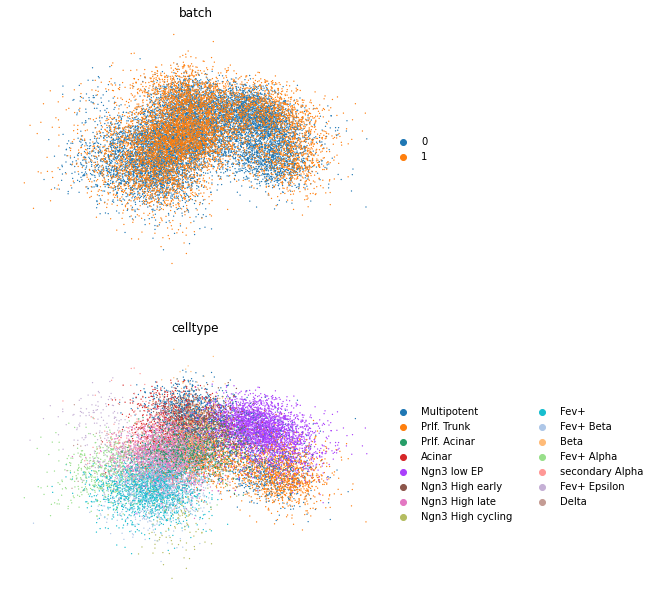

In [15]:
sc.pl.embedding(
    adata,
    basis="X_scVI",
    color=["batch", "celltype"],
    frameon=False,
    ncols=1,
)

# Embed ATAC

In [16]:
import poisson_atac as patac

In [17]:
adata_atac = adata_processed[:, adata_processed.var["feature_type"]=="ATAC"].copy()

In [18]:
np.unique(adata_atac.X[0,:].A)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 12., 22.,
       24., 26., 28., 77., 86.], dtype=float32)

In [19]:
adata_atac.layers["ATAC_counts"] = adata_atac.X.copy()

In [20]:
patac.model.PoissonVI.setup_anndata(adata_atac, layer="ATAC_counts", batch_key="sample")

In [21]:
poiss_vi = patac.model.PoissonVI(adata_atac)


In [22]:
poiss_vi.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.


Epoch 86/500:  17%|█▋        | 86/500 [39:05<3:08:09, 27.27s/it, loss=6.96e+04, v_num=1]
Monitored metric reconstruction_loss_validation did not improve in the last 50 records. Best score: 70490.086. Signaling Trainer to stop.


In [23]:
adata.obsm["X_poiss_vi"]=vae.get_latent_representation()
adata.layers["poiss_vi_normalized"] = vae.get_normalized_expression(library_size=10e4)

In [24]:
adata_atac.shape

(16978, 228321)

In [26]:
adata_atac_fil = sc.pp.filter_genes(adata_atac, min_cells=int(adata_atac.shape[0]*0.01))

In [28]:
adata_atac.shape

(16978, 179427)

In [ ]:
sc.pp.neighbors(adata, use_rep="X_poiss_vi")
# compute the umap
sc.tl.umap(adata, min_dist=0.2)

In [9]:
tp0 = TemporalProblem(adata_gex)
tp0.score_genes_for_marginals(gene_set_proliferation="mouse", gene_set_apoptosis="mouse")
tp0 = tp0.prepare("time", joint_attr="X_scVI")

In [10]:
tp0 = tp0.solve(epsilon=5e-2, scale_cost="mean", tau_a=0.8, tau_b=0.95, max_iterations=1e5)

/mnt/home/icb/dominik.klein/git_repos/moscot/moscot/solvers/_base_solver.py:211: UserWarning: Solver did not converge
  warnings.warn("Solver did not converge")


In [11]:
ct_desc = tp0.cell_transition(early_cells={}, late_cells="celltype", start=0, end=1, forward=True)

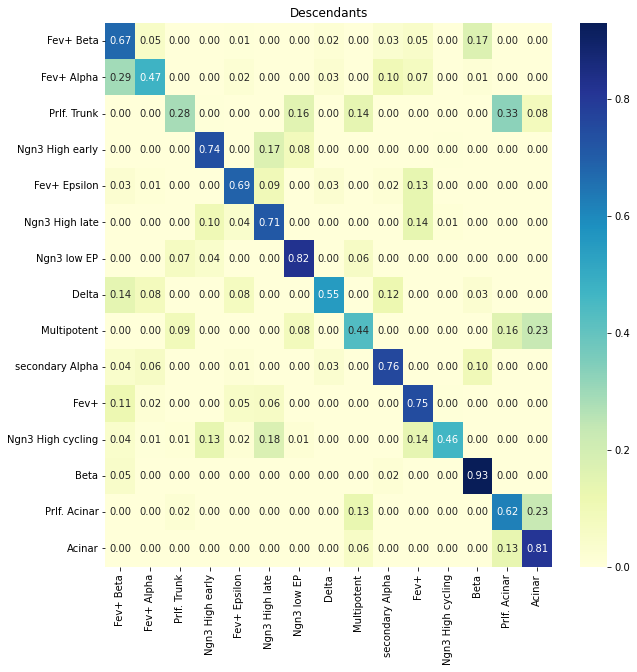

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(ct_desc, annot=True, cmap="YlGnBu", ax=ax, fmt=".2f", annot_kws={"fontsize": 10})
plt.title("Descendants")
plt.show()

In [46]:
ct_anc = tp0.cell_transition(early_cells="celltype", late_cells="celltype", start=0, end=1, forward=False)

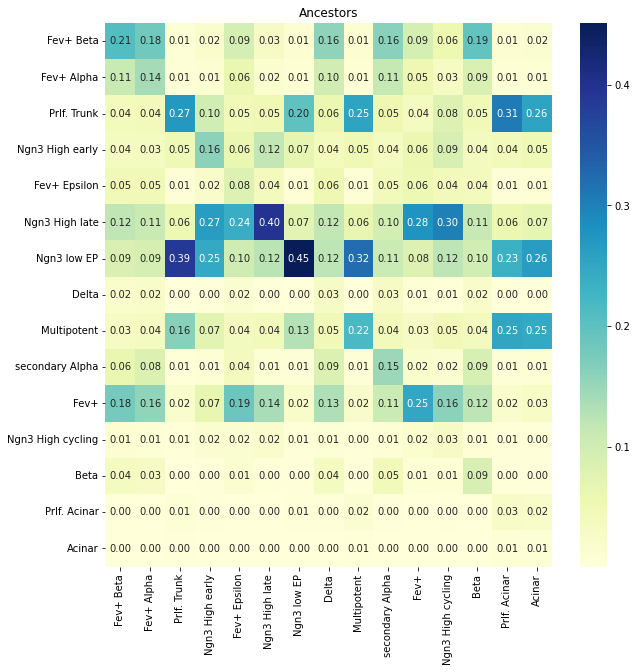

In [47]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(ct_anc, annot=True, cmap="YlGnBu", ax=ax, fmt=".2f", annot_kws={"fontsize": 10})
plt.title("Ancestors")
plt.show()

# PCA on ATAC space

In [111]:
adata_atac = adata[:, adata.var["feature_type"]=="ATAC"].copy()
adata_atac.obsm["X_pca"] = adata.obsm["ATAC_pca"].copy()
adata_atac.obsm["X_umap"] = adata.obsm["ATAC_umap"].copy()

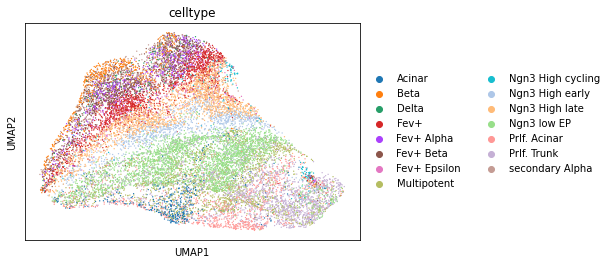

In [112]:
sc.pl.umap(adata_atac, color="celltype")

In [113]:
tp1 = TemporalProblem(adata_gex)
tp1 = tp1.prepare("time", joint_attr="ATAC_pca")

In [114]:
tp1 = tp1.solve(epsilon=1e-3, scale_cost="mean", tau_a=1, tau_b=1)

/mnt/home/icb/dominik.klein/git_repos/moscot/moscot/solvers/_base_solver.py:211: UserWarning: Solver did not converge
  warnings.warn("Solver did not converge")
/mnt/home/icb/dominik.klein/git_repos/moscot/moscot/solvers/_utils.py:26: UserWarning: Source marginals are not satisfied within rtol=1.0150223304912707e-05, atol=1.0150223304912707e-05.
  warnings.warn(msg)
/mnt/home/icb/dominik.klein/git_repos/moscot/moscot/solvers/_utils.py:26: UserWarning: Target marginals are not satisfied within rtol=1.4033118158854897e-05, atol=1.4033118158854897e-05.
  warnings.warn(msg)


In [115]:
ct_desc = tp1.cell_transition(early_cells="celltype", late_cells="celltype", start=0, end=1, forward=True)

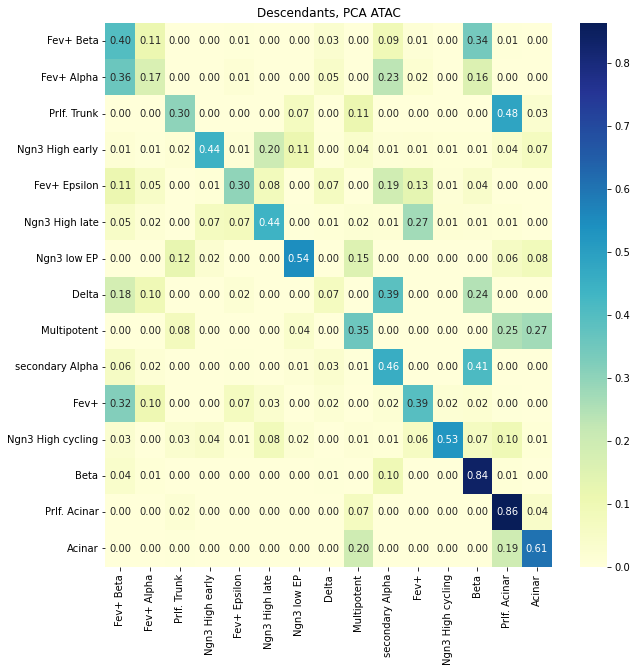

In [116]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(ct_desc, annot=True, cmap="YlGnBu", ax=ax, fmt=".2f", annot_kws={"fontsize": 10})
plt.title("Descendants, PCA ATAC")
plt.show()

In [117]:
ct_anc = tp1.cell_transition(early_cells="celltype", late_cells="celltype", start=0, end=1, forward=False)

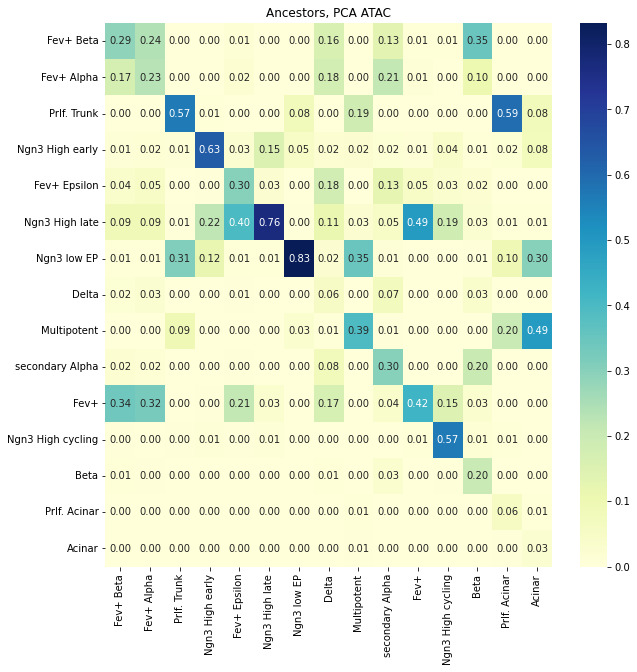

In [118]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(ct_anc, annot=True, cmap="YlGnBu", ax=ax, fmt=".2f", annot_kws={"fontsize": 10})
plt.title("Ancestors, PCA ATAC")
plt.show()

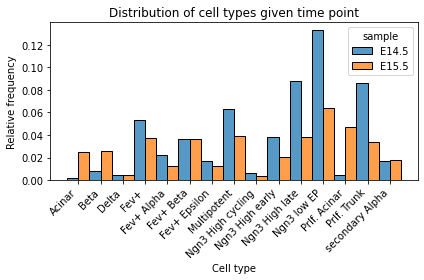

In [63]:
sns.histplot(data=adata_atac.obs, x="celltype", hue="sample", multiple='dodge', stat = 'probability')
plt.xlabel("Cell type")
plt.ylabel("Relative frequency")
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of cell types given time point")
plt.tight_layout()

# PCA on GEX + PCA on ATAC space

In [92]:
from sklearn.metrics import pairwise_distances
import numpy as np

In [85]:
adata.obsm["GEX_pca"].std(), adata.obsm["ATAC_pca"].std()

(1.8982601, 15.407883)

In [90]:
gex_pca_tr = StandardScaler().fit_transform(adata.obsm["GEX_pca"])
atac_pca_tr = StandardScaler().fit_transform(adata.obsm["ATAC_pca"])

In [93]:
adata.obsm["joint_PCA"] = np.concatenate((gex_pca_tr, atac_pca_tr), axis=1)

In [79]:
C_gex = pairwise_distances(adata_gex[adata_gex.obs["time"]==0].obsm["X_pca"], adata_gex[adata_gex.obs["time"]==1].obsm["X_pca"], metric="sqeuclidean")
C_atac = pairwise_distances(adata_atac[adata_atac.obs["time"]==0].obsm["X_pca"], adata_atac[adata_atac.obs["time"]==1].obsm["X_pca"], metric="sqeuclidean")

In [119]:
tp2 = TemporalProblem(adata)
tp2 = tp2.prepare("time", joint_attr="joint_PCA")

In [120]:
tp2 = tp2.solve(epsilon=1e-3, scale_cost="mean", tau_a=1, tau_b=1)

In [121]:
ct_desc = tp2.cell_transition(early_cells="celltype", late_cells="celltype", start=0, end=1, forward=True)

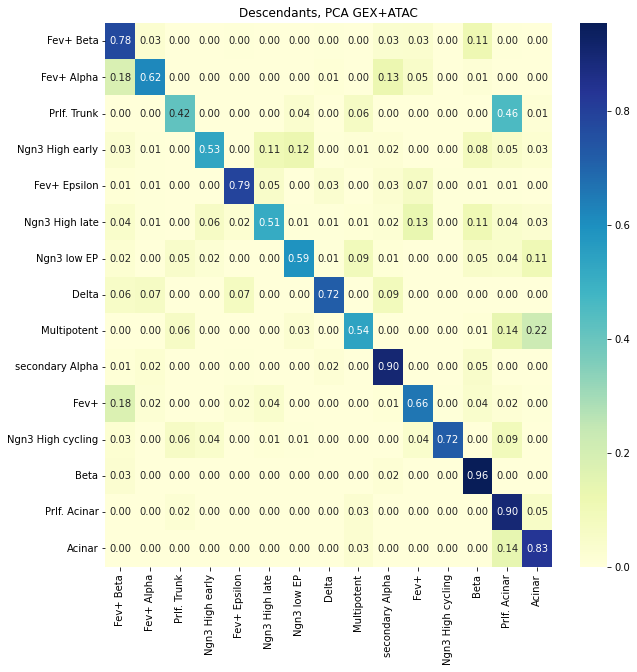

In [122]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(ct_desc, annot=True, cmap="YlGnBu", ax=ax, fmt=".2f", annot_kws={"fontsize": 10})
plt.title("Descendants, PCA GEX+ATAC")
plt.show()

In [103]:
ct_anc = tp2.cell_transition(early_cells="celltype", late_cells="celltype", start=0, end=1, forward=False)

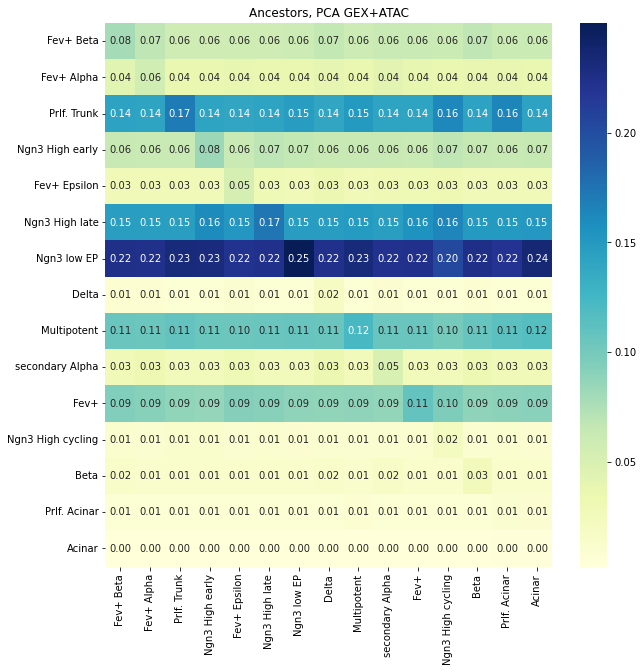

In [105]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(ct_anc, annot=True, cmap="YlGnBu", ax=ax, fmt=".2f", annot_kws={"fontsize": 10})
plt.title("Ancestors, PCA GEX+ATAC")
plt.show()

In [107]:
tp.cell_costs_source

,cell_cost_source
AAACAGCCAACAGCCT-1-0,-0.101696
AAACAGCCAACCCTCC-1-0,0.454478
AAACAGCCACCTGTAA-1-0,0.584158
AAACAGCCACTAAGCC-1-0,-0.144692
AAACAGCCAGGATAAC-1-0,-0.429829
...,...
TTTGTGTTCTTGTTCG-1-1,NaN
TTTGTTGGTATTGAGT-1-1,NaN
TTTGTTGGTCCTAAGA-1-1,NaN
TTTGTTGGTTAACAGT-1-1,NaN


In [108]:
sc.pl.umap(adata_gex, color=tp.cell_costs_source)

KeyError: "Could not find entry in `obsm` for 'umap'.\nAvailable keys are: ['ATAC_pca', 'ATAC_umap', 'GEX_pca', 'GEX_umap', 'X_pca']."

In [110]:
adata_gex

AnnData object with n_obs × n_vars = 16978 × 228321
    obs: 'n_counts', 'sample', 'int_id', 'reporter', 'log_cell_probs', 'cell_barcodes_du', 'cell_barcodes_cr', 'cell_barcodes', 'log_counts', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac', 'total_counts_rank', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'log_nCount_ATAC', 'log_nFeature_ATAC', 'scrublet_scores', 'scrublet_doublets', 'scrublet_doublets_cat', 'dd_doublets', 'dd_scores', 'dd_log_p_values', 'dd_voting_average', 'dd_-log_p_values', 'dd_doublets_cat', 'pANN', 'DF_classifications_1', 'DF_classifications_2', 'pANN_SCT', 'DF_SCT_classifications_1', 'DF_SCT_classifications_2', 'df_doublets'